In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pricing_data = pd.read_csv("Dataset.csv")

In [4]:
pricing_data.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


In [5]:
pricing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


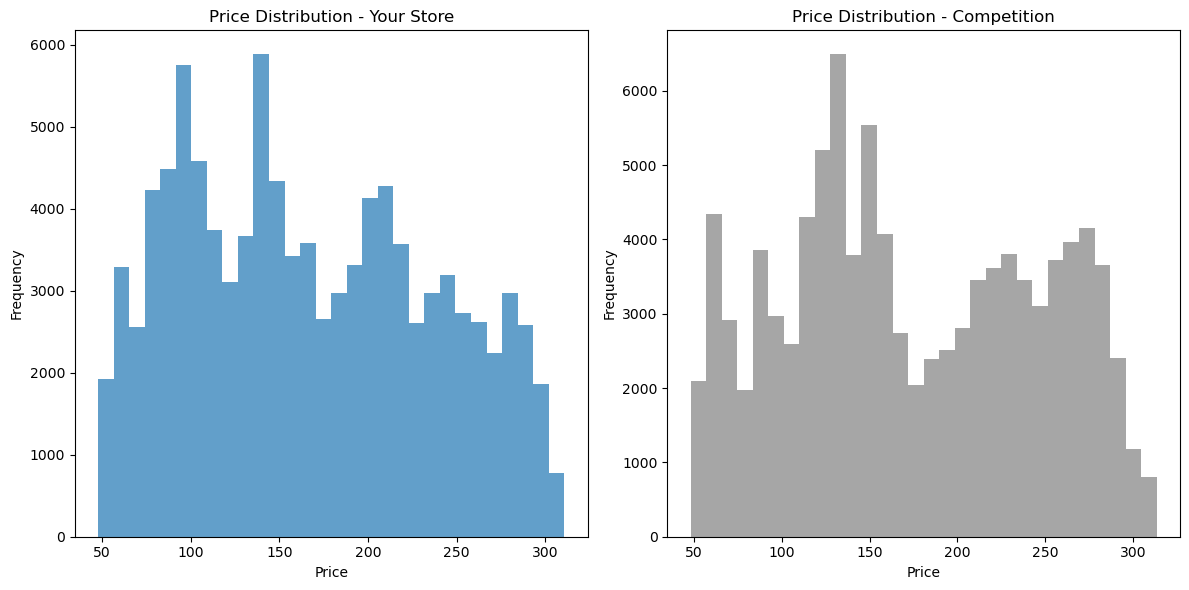

In [6]:
# Create a new figure for plotting, setting the size to 12 (width) x 6 (height) inches
plt.figure(figsize = (12,6))

# Create the first subplot in a 1-row, 2-column grid, and activate the 1st subplot
plt.subplot(1, 2, 1)
# Plot a histogram for the 'Price' column in the pricing_data DataFrame
# bins=30 splits the data into 30 intervals
# alpha=0.7 sets the transparency level for the bars (0 is transparent, 1 is solid)
# label='Your Score' assigns a label to this histogram (can be used in legends)
plt.hist(pricing_data['Price'], bins = 30, alpha = 0.7, label = 'Your Store')
# Set the x-axis label as 'Price'
plt.xlabel('Price')
# Set the y-axis label as 'Frequency'
plt.ylabel('Frequency')
# Set the title of the current subplot
plt.title('Price Distribution - Your Store')

# Create the second subplot in the same grid, and activate the 2nd subplot
plt.subplot(1, 2, 2)
# Plot a histogram for the 'Competition_Price' column from pricing_data
# bins=30, alpha=0.7 (transparency), label='competition'; color='Gray' sets the bar color to gray
plt.hist(pricing_data['Competition_Price'], bins = 30, alpha = 0.7, label = 'competition', color = 'Gray')
# Set the x-axis label as 'Price'
plt.xlabel('Price')
# Set the y-axis label as 'Frequency'
plt.ylabel('Frequency')
# Set the title of the current subplot
plt.title('Price Distribution - Competition')

# Adjust subplot layout to prevent overlap and make space for labels/titles
plt.tight_layout()
# Display all the plots/figures on the screen
plt.show()

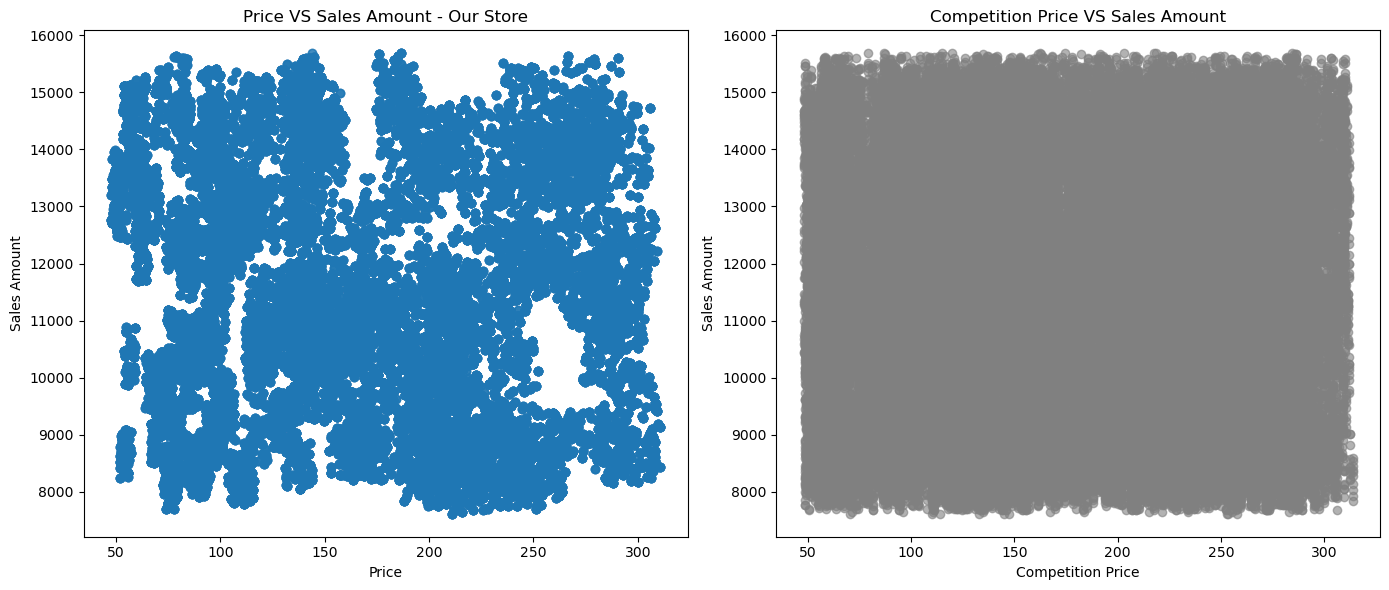

In [7]:
plt.figure(figsize= (14,6))

plt.subplot(1, 2, 1)
plt.scatter(pricing_data['Price'], pricing_data['Sales_Amount'], alpha= 0.6, label = 'Your Store')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.title('Price VS Sales Amount - Our Store')

plt.subplot(1, 2, 2)
plt.scatter(pricing_data['Competition_Price'], pricing_data['Sales_Amount'], alpha= 0.6, label= 'Competition', color= 'Gray')
plt.xlabel('Competition Price')
plt.ylabel('Sales Amount')
plt.title('Competition Price VS Sales Amount')

plt.tight_layout()
plt.show()

In [ ]:
# Convert the 'Fiscal_Week_ID' column to datetime format
# '%Y-%U-%w' tells pandas how to interpret the string: 
#   - %Y is the 4-digit year
#   - %U is the week number of the year (starting with Sunday as the first day of the week)
#   - %w is the weekday (0 = Sunday, 1 = Monday, ..., 6 = Saturday)
# We append '-1' to set the weekday explicitly as Monday (1), which helps pandas convert to a consistent date.
pricing_data['Fiscal_Week_ID'] = pd.to_datetime(pricing_data['Fiscal_Week_ID'] + '-1', format='%Y-%U-%w')

# Group the data by each fiscal week
# For each group (week), calculate the mean of 'Price' and 'Competition_Price'
# This helps in analyzing average prices and competition prices per week
weekly_prices = pricing_data.groupby('Fiscal_Week_ID').agg({
    'Price': 'mean',
    'Competition_Price': 'mean'
}).reset_index()

print(weekly_prices)

  Fiscal_Week_ID       Price  Competition_Price
0     2019-03-18  166.352333         175.018236
1     2019-03-25  166.486184         173.169854
2     2019-04-01  169.865254         173.161543
3     2019-04-08  164.892479         174.914615
4     2019-04-15  167.455556         175.189035


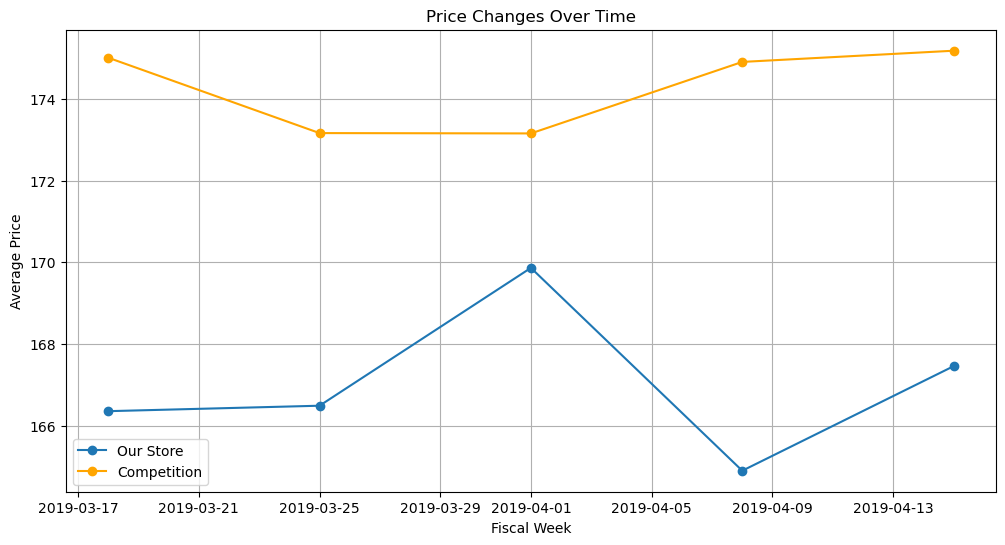

In [9]:
plt.figure(figsize=(12, 6))

plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Price'], label='Our Store', marker='o')
plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Competition_Price'], label='Competition', marker='o', color='orange')

plt.xlabel('Fiscal Week')
plt.ylabel('Average Price')
plt.title('Price Changes Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Calculate the **percentage change** in the 'Price' column from one row to the next.
# This helps track how much the price changes over time.
# The result is stored in a new column named 'price_change'.
pricing_data['price_change'] = pricing_data['Price'].pct_change()

# Similarly, calculate the **percentage change** in 'Item_Quantity' (number of items sold).
# This helps understand how demand changes week over week.
pricing_data['qty_change'] = pricing_data['Item_Quantity'].pct_change()

# Calculate **price elasticity of demand** using the formula:
#   Elasticity (Ed) = (% change in quantity demanded) / (% change in price)
# A high elasticity means quantity is very responsive to price changes.
pricing_data['elasticity'] = pricing_data['qty_change'] / pricing_data['price_change']

# Sometimes, division by zero or undefined operations can result in infinity (inf or -inf).
# These are replaced with NaN (Not a Number) for clean data processing.
pricing_data.replace([float('inf'), -float('inf')], float('nan'), inplace = True)

# Remove rows where the 'elasticity' value is NaN, since they don't provide meaningful insights.
# This keeps only valid rows with proper elasticity values.
pricing_data.dropna(subset = ['elasticity'], inplace = True)

In [11]:
print(pricing_data)

       Index Fiscal_Week_ID   Store_ID   Item_ID   Price  Item_Quantity  \
10        10     2019-03-18  store_709  item_526  136.79            459   
20        20     2019-03-18  store_442  item_526  138.67            458   
30        30     2019-03-18  store_136  item_526  128.93            459   
40        40     2019-03-18  store_601  item_526  134.45            436   
50        50     2019-03-18  store_458  item_526  134.13            435   
...      ...            ...        ...       ...     ...            ...   
99975  99975     2019-04-15  store_458  item_743   98.89            353   
99980  99980     2019-04-15  store_162  item_743   94.97            343   
99985  99985     2019-04-15   store_30  item_743   92.61            364   
99990  99990     2019-04-15  store_594  item_743  100.41            367   
99995  99995     2019-04-15  store_197  item_743   94.10            351   

       Sales_Amount_No_Discount  Sales_Amount  Competition_Price  \
10                      4890.43

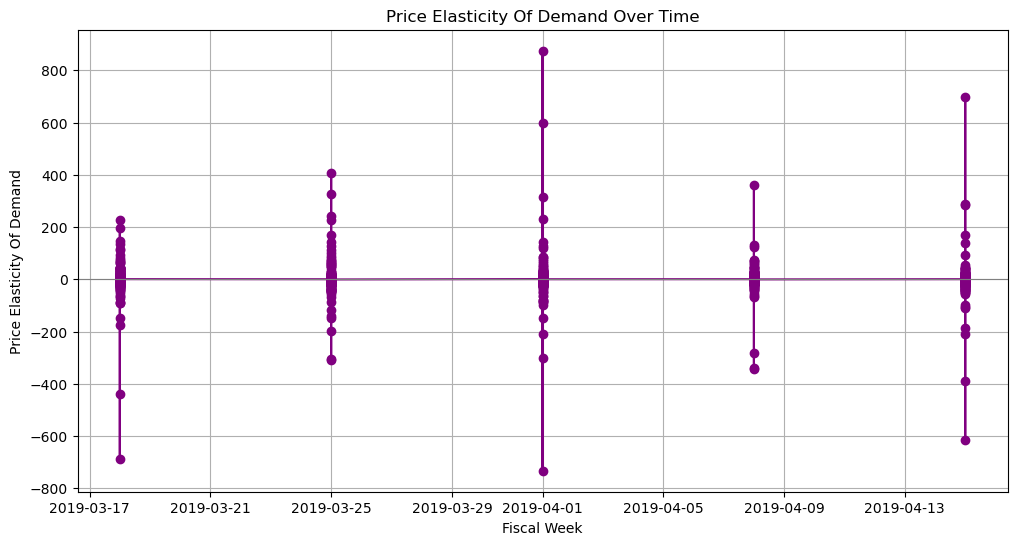

In [12]:
plt.figure(figsize = (12,6))
plt.plot(pricing_data['Fiscal_Week_ID'], pricing_data['elasticity'], marker= 'o', linestyle= '-', color= 'purple')# 'marker' adds dots at each data point, 'linestyle' defines the connecting line, and 'color' sets the line color.
plt.axhline(0, color='grey', linewidth= 0.8)# Add a horizontal reference line at y=0, colored grey, with a thin linewidth
plt.xlabel('Fiscal Week')
plt.ylabel('Price Elasticity Of Demand')
plt.title('Price Elasticity Of Demand Over Time')
plt.grid(True)
plt.show()

In [13]:
# Calculate the total revenue (sales amount) from our store by summing all values in the 'Sales_Amount' column.
total_sales_our_store = pricing_data['Sales_Amount'].sum()

# Estimate the total revenue for the competition.
# This is done by multiplying each week's competition price by the quantity sold in our store (assuming same quantity sold).
# Then sum the results to get the total revenue for the competition.
total_sales_competition = (pricing_data['Competition_Price'] * pricing_data['Item_Quantity']).sum()

# Calculate the total quantity of items sold in our store.
total_qty_our_store = pricing_data['Item_Quantity'].sum()

# For simplicity, assume the competition sells the same quantity as we do.
total_qty_competition = pricing_data['Item_Quantity'].sum()  # assumption-based comparison

# Create a summary DataFrame to neatly display total sales and quantities side by side for both stores.
summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantities Sold'],
    'Our Store': [total_sales_our_store, total_qty_our_store],
    'Comptetition': [total_sales_competition, total_qty_competition]
})

summary

,Metric,Our Store,Comptetition
0,Total Sales Amount,1.141005e+08,6.962097e+08
1,Total Quantities Sold,3.984776e+06,3.984776e+06


In [14]:
#define price brackets
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# Create price brackets for our store using specified bins and labels
# pd.cut() segments 'Price' into discrete intervals (bins) and assigns a label for each bracket
# right=False means intervals include the left value but not the right
pricing_data['price_bracket'] = pd.cut(pricing_data['Price'], bins=bins, labels=labels, right=False)

# Create price brackets for the competition using the same bins and labels
pricing_data['competition_price_bracket'] = pd.cut(pricing_data['Competition_Price'], bins=bins, labels=labels, right=False)

# Calculate the total sales amount for our store within each price bracket
# .groupby('price_bracket') groups the data by 'price_bracket'
# ['Sales_Amount'].sum() calculates the sum of 'Sales_Amount' for each bracket
# .reset_index() turns the groupby result back into a DataFrame
sales_by_bracket_our_store = pricing_data.groupby('price_bracket')['Sales_Amount'].sum().reset_index()

# Rename the columns for clarity
sales_by_bracket_our_store.columns = ['Price Bracket', 'Our Store Sales Amount']

# Calculate the sales amount for competition in each price bracket
# First, compute total sales value for the competition (Competition_Price × Item_Quantity)
pricing_data['competition_sales_amt'] = pricing_data['Competition_Price'] * pricing_data['Item_Quantity']

# Group by 'competition_price_bracket' and sum sales amounts in each bracket
sales_by_bracket_competition = pricing_data.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()

# Rename columns for clarity
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

# Combine the two tables into one by merging on 'Price Bracket'
sales_by_bracket = pd.merge(sales_by_bracket_our_store, sales_by_bracket_competition, on='Price Bracket')

# Display the resulting DataFrame showing both our store and competition sales amounts by price bracket
sales_by_bracket

,Price Bracket,Our Store Sales Amount,Competition Sales Amount
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29645669.06,1.278404e+08
3,151-200,20658418.18,1.092184e+08
4,201-250,20742288.10,1.909748e+08
5,251-300,16778087.66,2.047670e+08
6,301-350,1292959.36,1.358583e+07
7,351-400,0.00,0.000000e+00
8,401-450,0.00,0.000000e+00
9,451-500,0.00,0.000000e+00


In [15]:
# -------- Segment customers based on purchasing behavior --------

# Step 1: Calculate the average price and total quantity sold for each item.
# Group by 'Item_ID', then compute mean of prices and sum of quantities for each unique item.
item_summary = pricing_data.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

# Step 2: Merge this item-level summary back into the original dataset.
# This lets us compare each transaction with the item's overall stats.
# 'suffixes' ensures that the new columns get '_avg' added to avoid name conflicts.
pricing_data = pd.merge(pricing_data, item_summary, on='Item_ID', suffixes=('', '_avg'))

# Step 3: Segment the data based on the average price of each item.
# 'pd.cut()' is used to bin numeric data into discrete intervals.
# Items are categorized into 'Low', 'Medium', and 'High' price segments based on their average price.
pricing_data['segment'] = pd.cut(pricing_data['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])

# Step 4: Analyze price elasticity for each segment separately.
segments = pricing_data['segment'].unique()  # Get unique segments (Low, Medium, High)
elasticity_data = []  # To store average elasticity for each segment

for segment in segments:
    # Filter data for the current segment
    segment_data = pricing_data[pricing_data['segment'] == segment]

    # Recalculate % changes in price and quantity within the segment
    segment_data['price_change'] = segment_data['Price'].pct_change()
    segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()

    # Calculate elasticity within the segment
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']

    # Clean up infinite values resulting from division errors
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

    # Compute the average elasticity for the segment
    avg_elasticity = segment_data['elasticity'].mean()

    # Store the result as a dictionary
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

# Step 5: Convert the list of segment-wise results into a DataFrame for display
elasticity_df = pd.DataFrame(elasticity_data)

elasticity_df

C:\Users\allen\AppData\Local\Temp\ipykernel_14148\3731214998.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['price_change'] = segment_data['Price'].pct_change()
C:\Users\allen\AppData\Local\Temp\ipykernel_14148\3731214998.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
C:\Users\allen\AppData\Local\Temp\ipykernel_14148\3731214998.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,segment,avg_elasticity
0,Medium,0.071118
1,High,0.143993


In [16]:
# -------- Simulate Dynamic Pricing Strategy --------

# Create a copy of the dataset to simulate pricing changes without modifying the original data.
dynamic_pricing_data = pricing_data.copy()

# Apply dynamic pricing rules:
# For 'Medium' segment items, increase the price by 5%
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Medium', 'dynamic_price'] = dynamic_pricing_data['Price'] * 1.05

# For 'High' segment items, decrease the price by 10%
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'High', 'dynamic_price'] = dynamic_pricing_data['Price'] * 0.90

# Calculate new sales amount using the dynamically adjusted prices.
# This simulates what the total revenue would be if these new prices were applied.
dynamic_pricing_data['dynamic_sales_amount'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Item_Quantity']

# Compare total revenue 
total_sales_existing = pricing_data['Sales_Amount'].sum()
total_sales_dynamic = dynamic_pricing_data['dynamic_sales_amount'].sum()

# Compare total quantities sold 
total_qty_existing = pricing_data['Item_Quantity'].sum()
total_qty_dynamic = dynamic_pricing_data['Item_Quantity'].sum()

comparison_summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Dynamic Pricing': [total_sales_dynamic, total_qty_dynamic]
})

comparison_summary

,Metric,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,1.141005e+08,6.226950e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


In [17]:
pricing_data['dynamic_price'] = dynamic_pricing_data['dynamic_price']

In [18]:
pricing_data

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity,price_bracket,competition_price_bracket,competition_sales_amt,Price_avg,Item_Quantity_avg,segment,dynamic_price
0,10,2019-03-18,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,0.055172,3.226147,101-150,201-250,94755.96,132.061224,21792,Medium,143.6295
1,20,2019-03-18,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,-0.002179,-0.158520,101-150,201-250,94549.52,132.061224,21792,Medium,145.6035
2,30,2019-03-18,store_136,item_526,128.93,459,4962.56,11216.19,206.44,-0.070239,0.002183,-0.031086,101-150,201-250,94755.96,132.061224,21792,Medium,135.3765
3,40,2019-03-18,store_601,item_526,134.45,436,4704.89,10980.31,206.44,0.042814,-0.050109,-1.170389,101-150,201-250,90007.84,132.061224,21792,Medium,141.1725
4,50,2019-03-18,store_458,item_526,134.13,435,4558.87,11168.10,206.44,-0.002380,-0.002294,0.963661,101-150,201-250,89801.40,132.061224,21792,Medium,140.8365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,99915,2019-04-15,store_458,item_117,55.52,449,6210.17,9021.43,182.25,0.049329,-0.002222,-0.045049,51-100,151-200,81830.25,54.342449,21307,Medium,58.2960
9987,99922,2019-04-15,store_162,item_117,54.19,425,5936.38,8746.34,182.25,-0.023955,-0.053452,2.231324,51-100,151-200,77456.25,54.342449,21307,Medium,56.8995
9988,99929,2019-04-15,store_30,item_117,52.74,453,6092.06,8599.93,182.25,-0.026758,0.065882,-2.462183,51-100,151-200,82559.25,54.342449,21307,Medium,55.3770
9989,99936,2019-04-15,store_594,item_117,56.19,425,5675.94,8552.51,182.25,0.065415,-0.061810,-0.944889,51-100,151-200,77456.25,54.342449,21307,Medium,58.9995
